In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_mlp = pd.read_csv("df_thcv_tfidf.csv")

In [3]:
df_mlp

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..THCV
0,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.030928
1,1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.030928
2,4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.030928
3,7,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,1,1,0.030928
4,11,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0.030928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42976,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0.154639
74996,42976,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0.154639
74997,42976,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0.154639
74998,42976,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0.154639


In [4]:
df_mlp.columns.to_list()

['index',
 'tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',

In [5]:
X = df_mlp.drop(['index', 'X..THCV'], axis = 1)
y = df_mlp[['X..THCV']]

<Axes: ylabel='Count'>

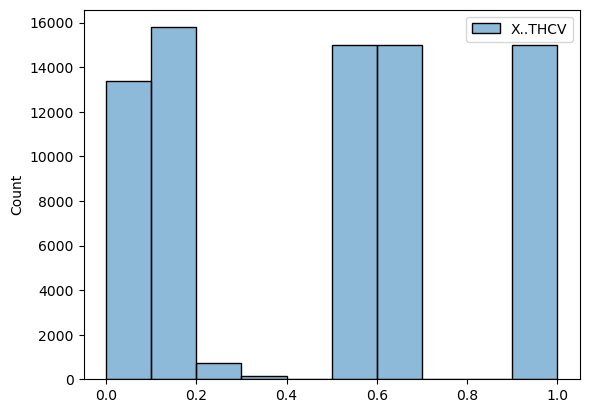

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
mean_absolute_error(y_val, y_pred_mlp)

0.02116767629610015

In [11]:
mean_squared_error(y_val, y_pred_mlp)

0.002609790292367848

In [12]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.05108610664718782

In [13]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.9899327759174392

In [14]:
#val
r2_score(y_val, y_pred_mlp)

0.978671255309107

Residual plots for each target variable

Feature Selection

In [15]:
rfreg = RandomForestRegressor()

In [16]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [17]:
selector.estimator_.feature_importances_

array([2.40712625e-04, 2.55290303e-05, 8.48136262e-05, 9.71988752e-04,
       1.98288171e-03, 6.04959217e-04, 1.86345631e-04, 1.05474166e-03,
       3.03236454e-05, 4.86632609e-05, 1.04564607e-04, 1.20779463e-03,
       6.56909557e-05, 1.89096165e-03, 2.80910993e-04, 3.92564314e-05,
       5.67128596e-05, 1.23950330e-04, 1.90426792e-05, 5.55367700e-04,
       9.86698462e-04, 7.87182920e-04, 1.93109778e-04, 1.13865701e-03,
       5.09204684e-04, 8.59846098e-06, 5.47791536e-03, 6.64028048e-05,
       2.18696673e-03, 4.00554790e-04, 8.63878788e-04, 6.01531500e-05,
       1.05596948e-04, 1.99914996e-05, 3.18509974e-04, 7.81125931e-05,
       4.48082757e-05, 1.25245346e-03, 7.24986865e-06, 2.43286055e-04,
       1.32165529e-04, 1.42698865e-04, 8.20522313e-05, 4.14051817e-03,
       1.31945261e-05, 1.73683196e-04, 7.04903897e-04, 1.01514181e-05,
       2.79706184e-04, 1.97352970e-05, 4.57085350e-05, 3.55839239e-03,
       1.13375585e-03, 3.12252928e-05, 8.58946837e-05, 7.59776651e-05,
      

In [18]:
selector.threshold_

0.0021321961620469083

In [19]:
mask = selector.get_support()

In [20]:
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,

In [21]:
selected_features = X.columns[mask]

In [22]:
selected_X = df_mlp[selected_features]
selected_X

,tfidf_26,tfidf_28,tfidf_43,tfidf_51,tfidf_78,tfidf_80,tfidf_82,tfidf_93,tfidf_97,tfidf_117,...,uplifted,apple,cheese,citrus,diesel,earthy,grape,lime,orange,sweet
0,0.0,0.0,0.000000,0.0,0.152565,0.0,0.0,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.253181,0.0,0.000000,...,1,0,1,0,0,0,0,0,0,0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.205162,0.0,0.000000,0.0,0.0,0.000000,0.0,0.140663,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,1,1,1,1,1,1,1,1,1,1
74996,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,1,1,1,1,1,1,1,1,1,1
74997,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,1,1,1,1,1,1,1,1,1,1
74998,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,1,1,1,1,1,1,1,1,1,1


In [23]:
selected_X.columns.to_list()

['tfidf_26',
 'tfidf_28',
 'tfidf_43',
 'tfidf_51',
 'tfidf_78',
 'tfidf_80',
 'tfidf_82',
 'tfidf_93',
 'tfidf_97',
 'tfidf_117',
 'tfidf_121',
 'tfidf_141',
 'tfidf_145',
 'tfidf_149',
 'tfidf_160',
 'tfidf_161',
 'tfidf_162',
 'tfidf_163',
 'tfidf_165',
 'tfidf_167',
 'tfidf_168',
 'tfidf_173',
 'tfidf_199',
 'tfidf_200',
 'tfidf_202',
 'tfidf_207',
 'tfidf_234',
 'tfidf_235',
 'tfidf_236',
 'tfidf_239',
 'tfidf_245',
 'tfidf_253',
 'tfidf_281',
 'tfidf_285',
 'tfidf_288',
 'tfidf_291',
 'tfidf_304',
 'tfidf_307',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_318',
 'tfidf_329',
 'tfidf_345',
 'tfidf_355',
 'tfidf_357',
 'tfidf_374',
 'tfidf_376',
 'tfidf_386',
 'hybrid',
 'creative',
 'euphoric',
 'focused',
 'giggly',
 'hungry',
 'sleepy',
 'tingly',
 'uplifted',
 'apple',
 'cheese',
 'citrus',
 'diesel',
 'earthy',
 'grape',
 'lime',
 'orange',
 'sweet']

In [24]:
import joblib

joblib.dump(selected_X, "selected_X_mlp_tfidf_thcv.pkl")
joblib.dump(selector, "selector_mlp_tfidf_thcv.pkl")

['selector_mlp_tfidf_thcv.pkl']

Train test split (after Feature Selection)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [26]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [27]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.0336359672701631

In [29]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.9713127631198084

In [30]:
#val
r2_score(y_val, y_pred_mlpreg)

0.9599953464740636

Hyperparameter Tuning

In [31]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'],
              'max_iter': [200, 500, 1000]
              }

In [32]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [33]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perce

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv.best_params_

{'max_iter': 1000, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu'}

In [35]:
joblib.dump(rscv, "rscv_mlp_tfidf_thcv.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_tfidf_best_params_thcv.pkl")

['rscv_mlp_tfidf_best_params_thcv.pkl']

MLP fit (after hyperparameter tuning)

In [36]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=1000, hidden_layer_sizes=(50,100,50), activation='relu', early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.0229843072931825

In [38]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.003361873077352443

In [39]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.05798166156081113

In [40]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.9781407399657027

In [41]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.972653234590704

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [42]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [43]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_tfidf_thcv.pkl")
joblib.dump(y_test, "y_test_mlpreg_tfidf_thcv.pkl")

['y_test_mlpreg_tfidf_thcv.pkl']

In [44]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.023867362626062906

In [45]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.0037778003340836423

In [46]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.06146381320812794

In [47]:
r2_score(y_test, y_pred_mlpreg_test)

0.9688418161070423

Error analysis

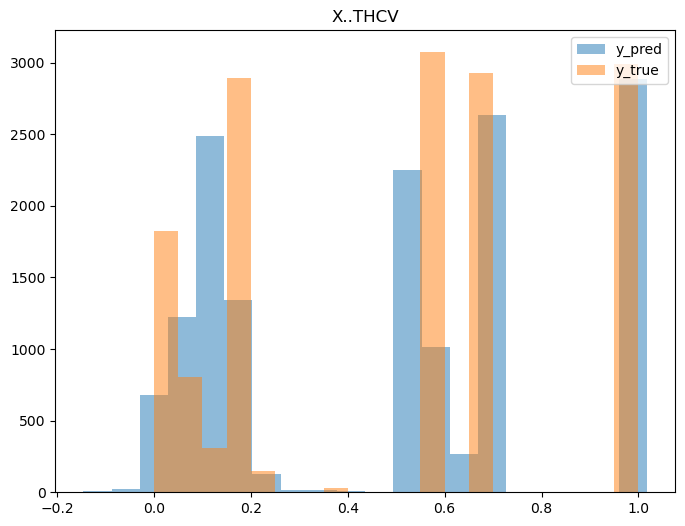

<Figure size 640x480 with 0 Axes>

In [48]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..THCV"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_tfidf_thcv.png')

Pearson R

In [49]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.984
P-value: 0.000


<Axes: >

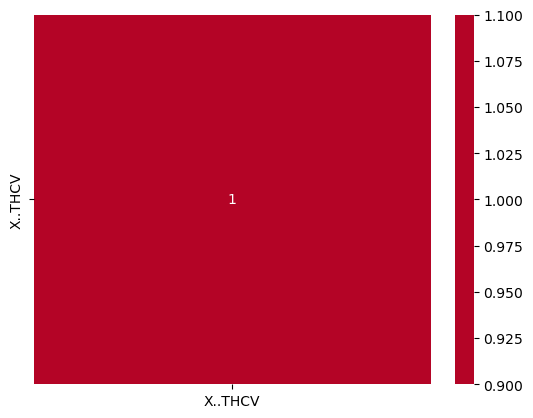

In [50]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)